In [1]:
import os



In [2]:
print(os.getcwd())


/Users/shilpabhandari/Desktop/Cell_Image_Analysis


In [3]:
data_dir = "/Users/shilpabhandari/Desktop/Cell_Image_Analysis/"



In [4]:
os.listdir(data_dir)

['.DS_Store',
 'requirements.txt',
 'test',
 'README.md',
 '.gitignore',
 '.venv',
 'train',
 'cellimageanalysis.ipynb',
 'cell_images',
 '.git']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
from matplotlib.image import imread


In [7]:
test_path = data_dir+'test/'
train_path = data_dir+'train/'


In [8]:
test_path


'/Users/shilpabhandari/Desktop/Cell_Image_Analysis/test/'

In [9]:
os.listdir(test_path)


['.DS_Store', 'parasitized', 'uninfected']

In [10]:
os.listdir(train_path)


['.DS_Store', 'parasitized', 'uninfected']

In [11]:
os.listdir(train_path+'parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [12]:
para_cell = os.path.join(train_path,'parasitized','C189P150ThinF_IMG_20151203_142224_cell_84.png')


In [13]:
para_cell

'/Users/shilpabhandari/Desktop/Cell_Image_Analysis/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

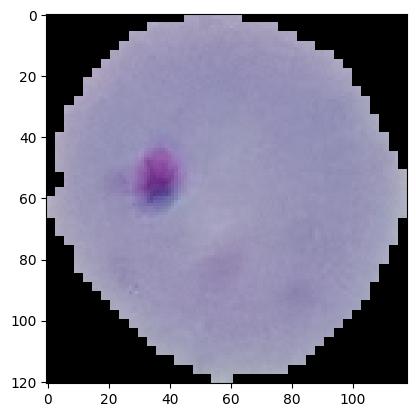

In [14]:
plt.imshow(imread(para_cell))


In [15]:
os.listdir(train_path+'uninfected')[0]



'C13NThinF_IMG_20150614_131318_cell_179.png'

In [16]:
uninfected_cell = os.path.join(train_path,'uninfected','C13NThinF_IMG_20150614_131318_cell_179.png')



In [17]:
uninfected_cell

'/Users/shilpabhandari/Desktop/Cell_Image_Analysis/train/uninfected/C13NThinF_IMG_20150614_131318_cell_179.png'

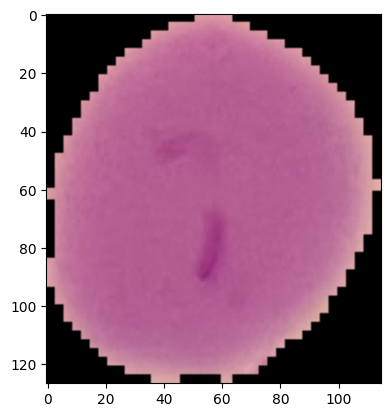

In [18]:
plt.imshow(imread(uninfected_cell))



In [19]:
#len(os.listdir(test_path+'parasitized'))

In [20]:
#len(os.listdir(test_path+'uninfected'))

In [21]:
dim1 = []
dim2 =[]

for image_filename in os.listdir(test_path+'uninfected'):

    img = imread(os.path.join(test_path,'uninfected',image_filename))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)


In [22]:
np.mean(dim1)


130.92538461538462

In [23]:
np.mean(dim2)

130.75

In [24]:
image_shape = (130,130,3)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [26]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range =0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest')

In [27]:
import scipy


In [28]:

image_gen.random_transform(imread(para_cell))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
#load images from directory and classify them based on subdirectory name
#apt for batch processing
image_gen.flow_from_directory(train_path)


Found 24958 images belonging to 2 classes.


In [30]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [31]:
from tensorflow.keras.models import Sequential


In [46]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Dropout,Flatten

In [41]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),input_shape = image_shape,activation = 'relu'))

In [42]:
model.add(MaxPool2D(pool_size=(2,2)))

In [43]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),input_shape = image_shape,activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))


In [44]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),input_shape = image_shape,activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))


In [47]:
model.add(Flatten())

In [49]:
model.add(Dense(128,activation = 'relu'))

In [50]:
model.add(Dropout(0.5))

In [51]:
model.add(Dense(1, activation = 'sigmoid'))

In [53]:
model.compile(loss = 'binary_crossentropy',optimizer = 
              'adam',metrics = ['accuracy'])

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)       

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(monitor='val_loss',patience = 2)

In [59]:
batch_size = 16

In [60]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size= batch_size,
                                                class_mode = 'binary')

Found 24958 images belonging to 2 classes.


In [62]:
test_image_gen =image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size= batch_size,
                                                class_mode = 'binary',shuffle = False)

Found 2600 images belonging to 2 classes.


In [65]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [67]:
results = model.fit(train_image_gen,epochs=20,validation_data=test_image_gen,
                              callbacks = [early_stop])

Epoch 1/20
1560/1560 [==============================] - ETA: 0s - loss: 0.6887 - accuracy: 0.5476 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x14f4ae7a0> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x14f4ae7a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x14f4ae7a0>. Note that functions defined in certain environments, like the interactive Python shel

In [68]:
model.history.history


{'loss': [0.6886734366416931,
  0.6795904040336609,
  0.6785131096839905,
  0.643596887588501,
  0.21754224598407745,
  0.18984581530094147,
  0.1802995651960373,
  0.1767515391111374,
  0.17518573999404907,
  0.1741611510515213,
  0.18415667116641998,
  0.16591483354568481,
  0.17792542278766632,
  0.16371245682239532,
  0.16969197988510132,
  0.16969577968120575],
 'accuracy': [0.5476400256156921,
  0.5792531371116638,
  0.5807356238365173,
  0.6288564801216125,
  0.9334081411361694,
  0.9413815140724182,
  0.944066047668457,
  0.9459091424942017,
  0.94638991355896,
  0.9461094737052917,
  0.9445869326591492,
  0.9487939476966858,
  0.9452279806137085,
  0.9471912980079651,
  0.9466303586959839,
  0.9462296366691589],
 'val_loss': [0.6800605058670044,
  0.6608772277832031,
  0.671097993850708,
  0.36754104495048523,
  0.19564561545848846,
  0.19153012335300446,
  0.1869475394487381,
  0.188449889421463,
  0.17554359138011932,
  0.1789509654045105,
  0.1638151854276657,
  0.173250749

In [70]:
pred =model.predict_generator(test_image_gen)

/var/folders/t5/9yxq16v12470wbp401x49pdr0000gn/T/ipykernel_10200/1325528836.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred =model.predict_generator(test_image_gen)


In [72]:
predictions = pred >0.5

In [73]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])